In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
df = pd.read_csv('./ml_source_files/Kyphosis.csv')
df.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
# Kyphosis - 질병 유무
# age - 기간, number - 의료 수치, start - 증상 시작 시점

In [35]:
y = df['Kyphosis']   # 예측대상 , target, label, y
x = df.drop('Kyphosis', axis = 1)

In [36]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [37]:
# train test data split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 111)

In [38]:
# algorithm import
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [13]:
# algorithm train

In [39]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
# model prediction

In [41]:
preds = tree.predict(x_test)

In [20]:
# model evaluation
# classification evalition : accuracy, precision, recall, f1_score, roc_score

In [42]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      absent       1.00      0.88      0.93        16
     present       0.33      1.00      0.50         1

    accuracy                           0.88        17
   macro avg       0.67      0.94      0.72        17
weighted avg       0.96      0.88      0.91        17



In [43]:
# 각 트리(칼럼)의 중요도를 보여준다
tree.feature_importances_

array([0.41328671, 0.10833333, 0.47837995])

In [45]:
from sklearn.tree import plot_tree

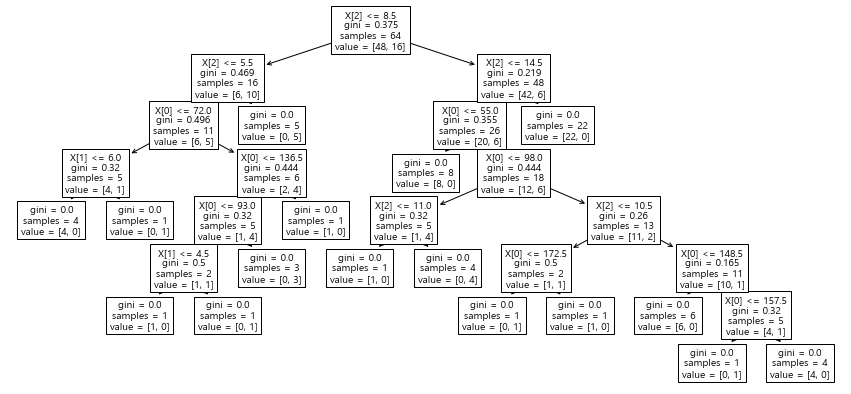

In [49]:
plt.figure(figsize = (15,7))
plot_tree(tree)
plt.show()

In [24]:
# ensemble : RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier
# tree를 500개
rfc = RandomForestClassifier(n_estimators = 500)

In [32]:
rfc.fit(x_train, y_train)
preds_rfc = rfc.predict(x_test)

In [33]:
print(classification_report(y_test,preds_rfc))

              precision    recall  f1-score   support

      absent       1.00      0.94      0.97        16
     present       0.50      1.00      0.67         1

    accuracy                           0.94        17
   macro avg       0.75      0.97      0.82        17
weighted avg       0.97      0.94      0.95        17



In [44]:
# 각 트리(칼럼)의 중요도를 보여준다
rfc.feature_importances_

array([0.38401465, 0.24509385, 0.3708915 ])